In [1]:
import pandas as pd
train_df = pd.read_csv('DATA/TRAIN.csv')

In [4]:
columnas_red = [
    'conn_fix_num_cortes_optic_naveg_fij_dm7_cli', # Número de cortes ópticos (Cantidad de desconexiones detectadas en la fibra óptica)
    'conn_fix_num_alarm_ont_fij_dm7_cli', # Número de alarmas ONT (Optical Network Terminal) dispositivo que conecta la fibra óptica en casa.
    'conn_fix_num_alarm_no_soluc_ont_fij_dm7_cli', # Número de alarmas ONT no solucionadas
    # 'con_max_latencia_naveg_mov_lin_dm7', # Mayor latencia obtenida en los últimos 7 días del cliente (Una latencia alta indica una conexión lenta.)
    # 'con_min_retrans_naveg_mov_lin_dm7', Menor proporcion de paquetes retransmitidos en los ultimos 7 dias del cliente
    'conn_fix_num_disp_mc_naveg_fij_dm7_cli', # Numero de dispositivos con mala conexión en fijo
    'conn_fix_avg_rssi_24_naveg_fij_dm7_cli', # # Media de RSSI (Received Signal Strength Indicator) conexión 2,4 GHz en los últimos 7 días del cliente
    'conn_fix_avg_rssi_5_naveg_fij_dm7_cli', # Media de RSSI (Received Signal Strength Indicator) conexión 5 GHz en los últimos 7 días del cliente                                      
    'conn_fix_oe_estado_ont_fij_dm7_cli', # Estado funcional ONT. 0 online, 1 provisioning, 2 degraded, 3 intermitente, 4 offline.
    'conn_fix_oe_alarm_ont_fij_dm7_cli', # Alarma asociada a ONT. 0 ninguna, 1 registradas, 2 crítica.
]

In [5]:
train_df_red = train_df[columnas_red]

In [4]:
for col in train_df:
    if "axe" in col: print(col)

axe_antiguedad
axe_superficiemediaviviendas
axe_totalviviendas
axe_miembrosfamilia
axe_nhijosestimados
axe_tipofamilia
axe_nucleo
axe_perfilnucleo
axe_perfilhijos
axe_renta
axe_precio_m2_finca
axe_valor_vivienda
axe_tasaparo
axe_media_tecno1
axe_media_tecno2
axe_media_tecno3
axe_media_tecno4
axe_media_gcfid1
axe_media_gcfid2
axe_media_gcfid3


In [6]:
train_df_red = train_df_red.dropna()

In [7]:
train_df_red['has_rssi_5'] = (train_df_red['conn_fix_avg_rssi_5_naveg_fij_dm7_cli'] != 0.0).astype(int)
train_df_red['has_rssi_24'] = (train_df_red['conn_fix_avg_rssi_24_naveg_fij_dm7_cli'] != 0.0).astype(int)
train_df_red = train_df_red.drop(columns=['conn_fix_avg_rssi_5_naveg_fij_dm7_cli', 'conn_fix_avg_rssi_24_naveg_fij_dm7_cli'])  # Elimina las columnas numéricas
# Así ignoramos el RSSI solo tenemos que frecuencias de red tiene el cliente contratada, evita sesgo

In [7]:
# train_df_red = train_df_red.drop('cluster', axis=1) # Borrar columna cluster

In [8]:
from sklearn.cluster import KMeans

# El modelo KMeans de sklearn realiza clustering basado en centroides.
# Asigna cada punto al centroide más cercano, ajustando los centroides iterativamente.

# Creamos el modelo KMeans con 4 clústeres
kmeans = KMeans(n_clusters=4, random_state=41, n_init=10)

# Entrenamos y predecimos los clústeres usando fit_predict
clusters_kmeans = kmeans.fit_predict(train_df_red)

# Añadimos la columna de clústeres a train_df_red
train_df_red['cluster'] = clusters_kmeans

In [9]:
print(train_df_red['cluster'].value_counts()) # Mostramos los datos de cada cluster

cluster
0    102470
3     80660
1     61801
2        65
Name: count, dtype: int64


In [10]:
# train_df_red = train_df_red[train_df_red['cluster'] != 3].copy() # Borrar un cluster con clientes outlayers

In [10]:
# Promedio por cluster para interpretar como se clasifican los clientes
train_df_red.groupby('cluster').mean()

,conn_fix_num_cortes_optic_naveg_fij_dm7_cli,conn_fix_num_alarm_ont_fij_dm7_cli,conn_fix_num_alarm_no_soluc_ont_fij_dm7_cli,conn_fix_num_disp_mc_naveg_fij_dm7_cli,conn_fix_oe_estado_ont_fij_dm7_cli,conn_fix_oe_alarm_ont_fij_dm7_cli,has_rssi_5,has_rssi_24
cluster,,,,,,,,
0,0.000000,0.000000,0.000000,0.239914,0.000000,0.0,0.719615,0.560183
1,1.292811,1.274478,0.150904,0.247666,1.115856,2.0,0.808498,0.617061
2,39.492308,39.000000,1.553846,0.276923,1.938462,2.0,0.707692,0.492308
3,0.000000,0.000000,0.000000,0.223171,1.191334,0.0,0.738619,0.555864


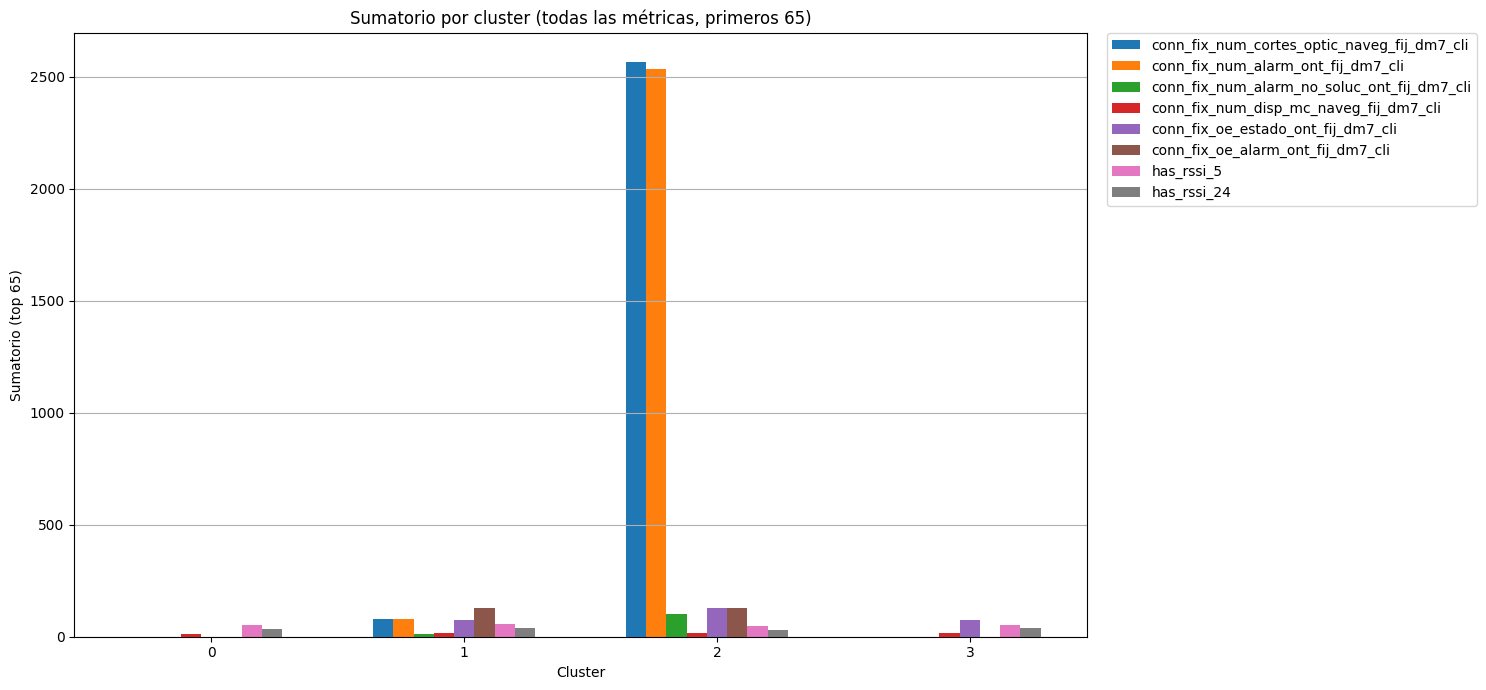

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de columnas a graficar (las del clustering)
columnas = [
    'conn_fix_num_cortes_optic_naveg_fij_dm7_cli',
    'conn_fix_num_alarm_ont_fij_dm7_cli',
    'conn_fix_num_alarm_no_soluc_ont_fij_dm7_cli',
    'conn_fix_num_disp_mc_naveg_fij_dm7_cli',
    'conn_fix_oe_estado_ont_fij_dm7_cli',
    'conn_fix_oe_alarm_ont_fij_dm7_cli',
    'has_rssi_5',
    'has_rssi_24',
    # col_comparar
]

# Agrupar y tomar los primeros 65 por cada 'cluster'
df_top = train_df_red.groupby('cluster').head(65)

# Obtener los valores únicos de cluster en orden ascendente
clusters = sorted(df_top['cluster'].unique())

# Preparar datos
suma_por_col = {}
for col in columnas:
    suma = df_top.groupby('cluster')[col].sum().reindex(clusters)
    suma_por_col[col] = suma

# Convertir a matriz para graficar
data_matrix = np.array([suma_por_col[col] for col in columnas])
n_col = len(columnas)
n_cats = len(clusters)
x = np.arange(n_cats)
width = 0.08  # Ancho más estrecho para caber todos los grupos

# Colores
colores = plt.cm.tab10.colors  # 10 colores diferentes

# Crear gráfico
plt.figure(figsize=(15, 7))
for i, col in enumerate(columnas):
    plt.bar(x + (i - n_col/2) * width, data_matrix[i], width, label=col, color=colores[i % len(colores)])

# Etiquetas
plt.xlabel('Cluster')
plt.ylabel('Sumatorio (top 65)')
plt.title('Sumatorio por cluster (todas las métricas, primeros 65)')
plt.xticks(x, clusters)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [15]:
check = train_df_red[['conn_fix_num_cortes_optic_naveg_fij_dm7_cli',
                      'conn_fix_num_alarm_ont_fij_dm7_cli']]
check.mean()

conn_fix_num_cortes_optic_naveg_fij_dm7_cli    0.336593
conn_fix_num_alarm_ont_fij_dm7_cli             0.331838
dtype: float64

In [16]:
check.max()

conn_fix_num_cortes_optic_naveg_fij_dm7_cli    119
conn_fix_num_alarm_ont_fij_dm7_cli             119
dtype: int64

In [17]:
check.min()

conn_fix_num_cortes_optic_naveg_fij_dm7_cli    0
conn_fix_num_alarm_ont_fij_dm7_cli             0
dtype: int64

In [18]:
check_sorted = check.sort_values(by=[
    'conn_fix_num_cortes_optic_naveg_fij_dm7_cli',
    'conn_fix_num_alarm_ont_fij_dm7_cli'
], ascending=[False, False])
check_sorted

,conn_fix_num_cortes_optic_naveg_fij_dm7_cli,conn_fix_num_alarm_ont_fij_dm7_cli
164137,119,119
23310,98,98
195465,95,94
92216,83,83
224623,83,83
...,...,...
244990,0,0
244991,0,0
244992,0,0
244993,0,0


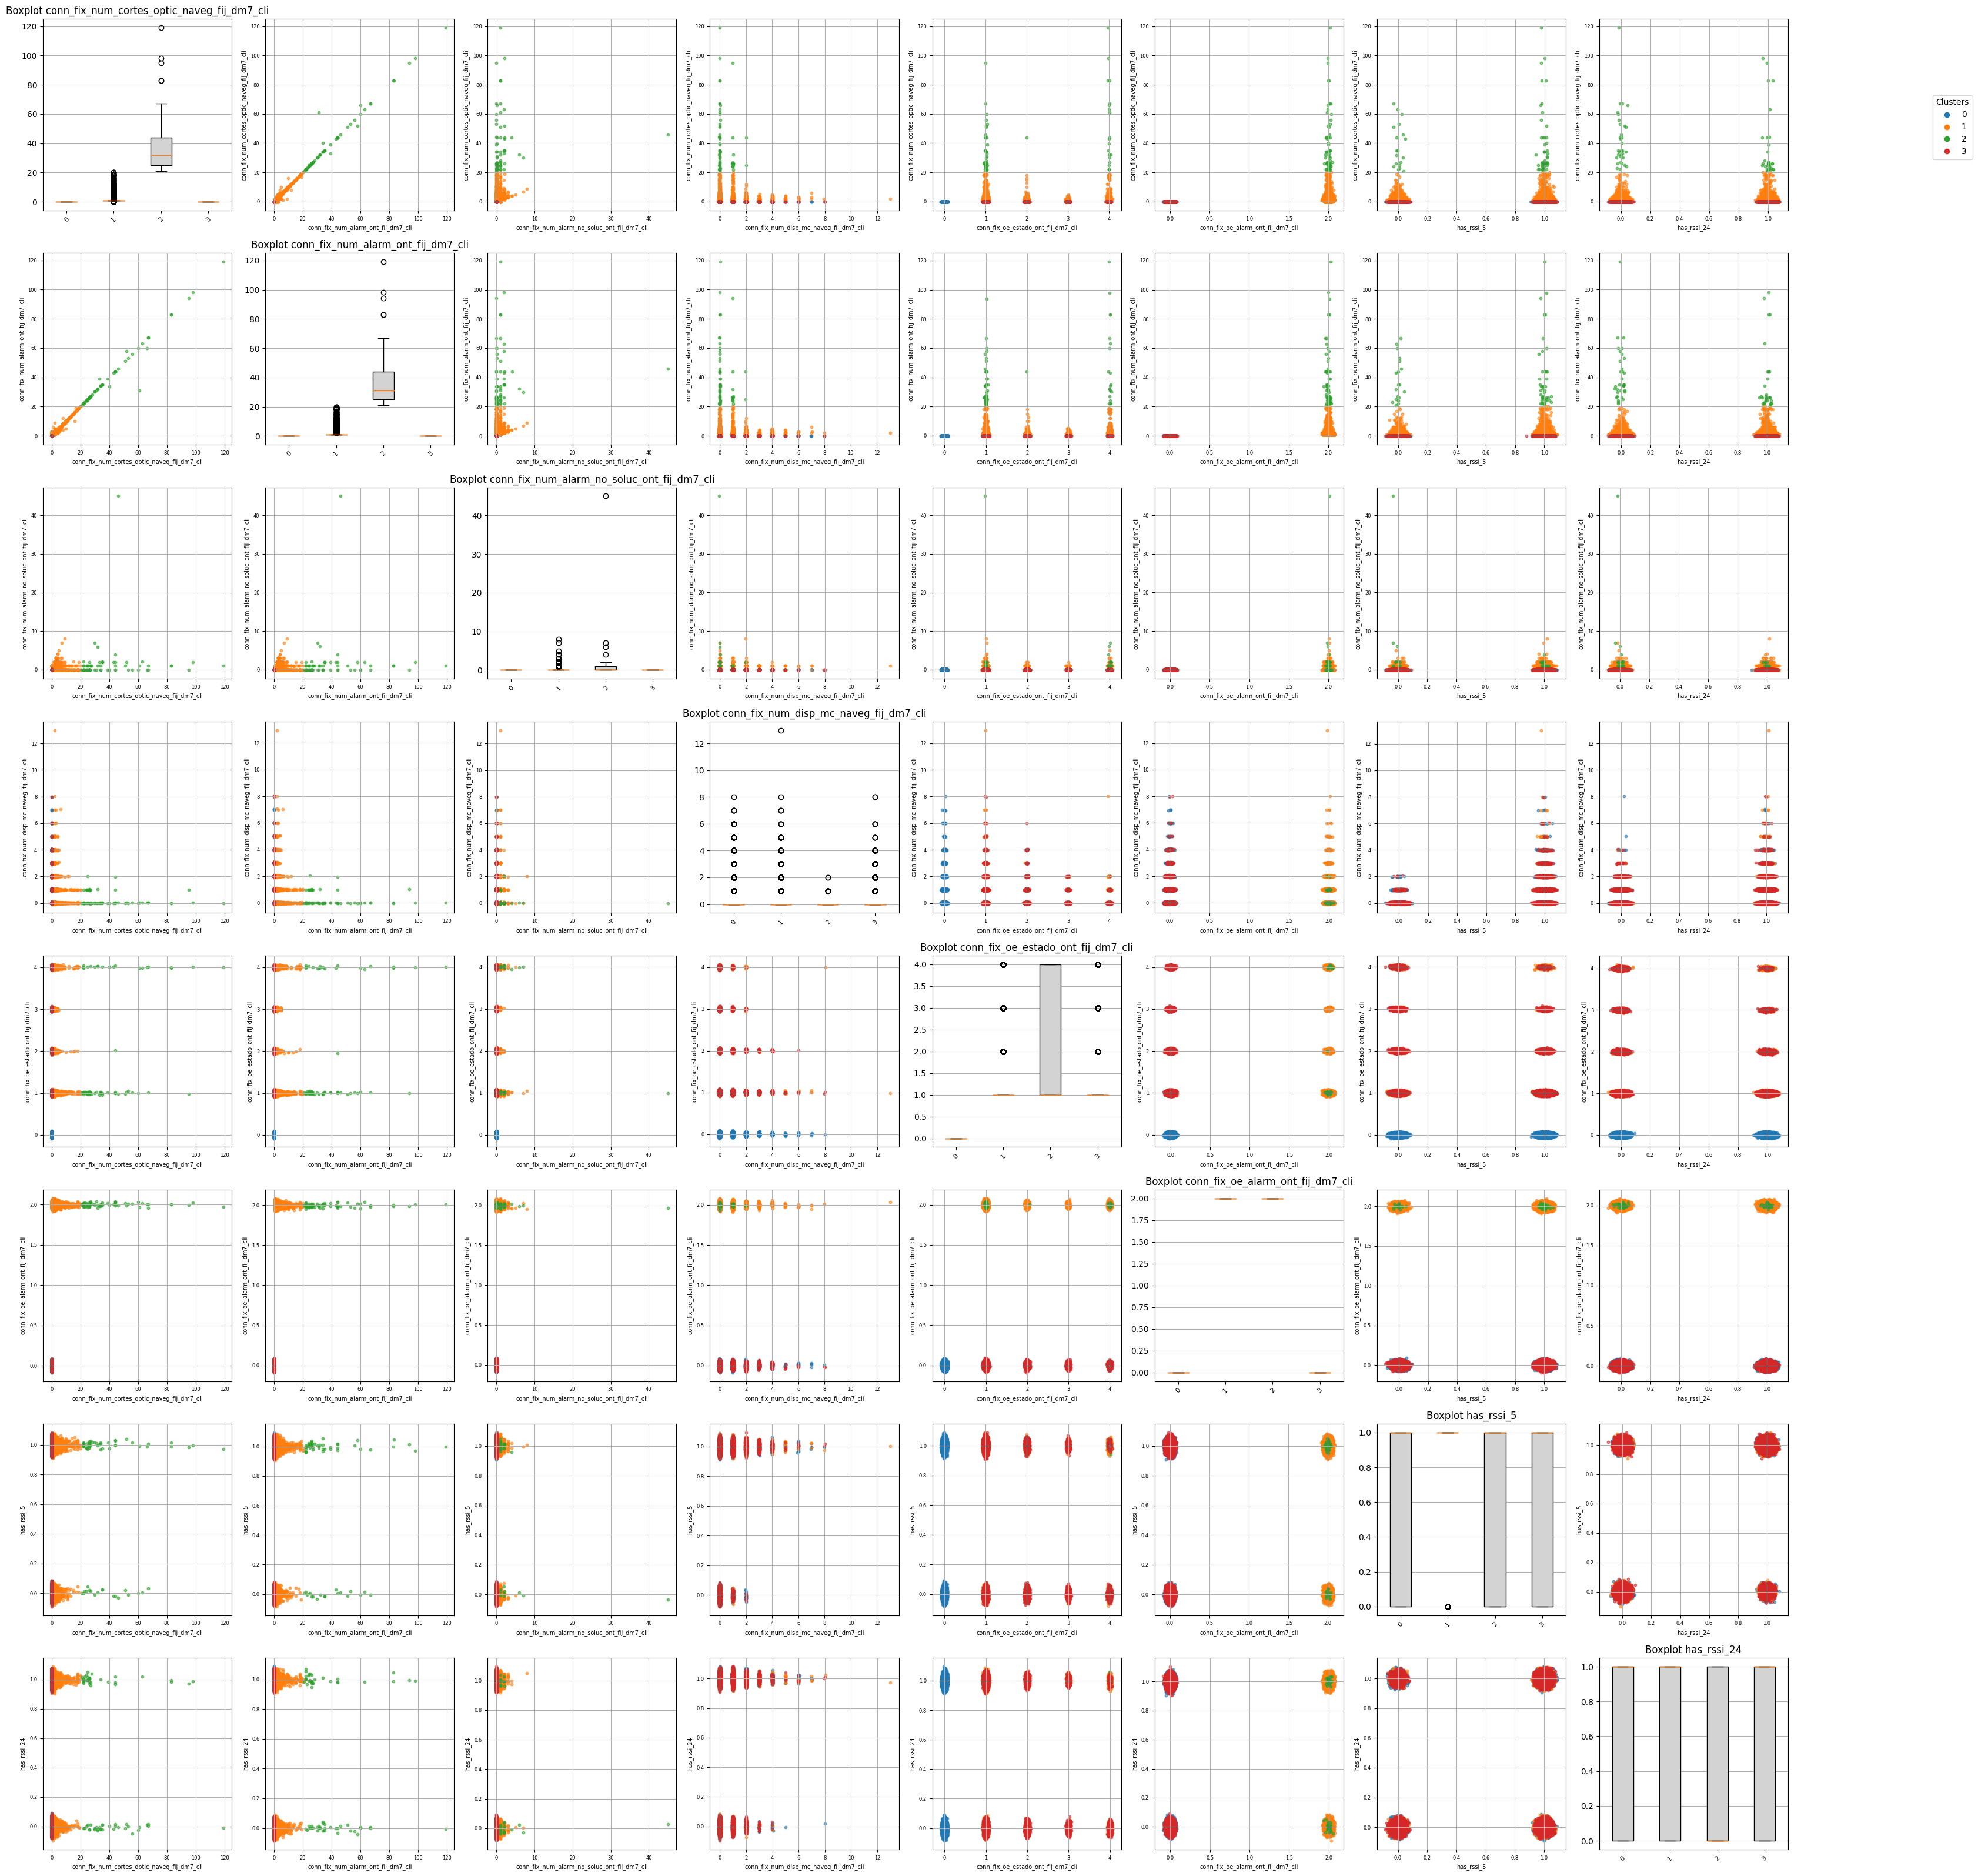

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Variables y clusters
cols = columnas
clusters = train_df_red['cluster'].astype(str).unique()
clusters.sort()

# Colores para clusters (los suficientes para clusters distintos)
colores = plt.cm.tab10.colors
color_map = {cluster: colores[i % len(colores)] for i, cluster in enumerate(clusters)}

n = len(cols)
fig, axes = plt.subplots(n, n, figsize=(4*n, 4*n))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Parámetro jitter
jitter_strength = 0.02

for i in range(n):
    for j in range(n):
        ax = axes[i, j]

        if i == j:
            # Diagonal: boxplot de la variable i por cluster
            data_to_plot = []
            for cluster in clusters:
                vals = train_df_red.loc[train_df_red['cluster']==cluster, cols[i]]
                data_to_plot.append(vals)

            ax.boxplot(data_to_plot, patch_artist=True,
                       boxprops=dict(facecolor='lightgray'))
            ax.set_xticks(np.arange(1, len(clusters)+1))
            ax.set_xticklabels(clusters, rotation=45, fontsize=8)
            ax.set_title(f'Boxplot {cols[i]}')
            ax.grid(axis='y')

        else:
            # Scatterplot con jitter
            for cluster in clusters:
                df_c = train_df_red[train_df_red['cluster'] == cluster]
                x = df_c[cols[j]] + np.random.normal(0, jitter_strength, size=len(df_c))
                y = df_c[cols[i]] + np.random.normal(0, jitter_strength, size=len(df_c))
                ax.scatter(x, y, s=10, alpha=0.6, label=cluster if (i == 0 and j == 1) else "", color=color_map[cluster])

            ax.set_xlabel(cols[j], fontsize=7)
            ax.set_ylabel(cols[i], fontsize=7)
            ax.tick_params(axis='both', which='major', labelsize=6)
            ax.grid(True)

# Añadir leyenda sólo una vez (en la esquina superior derecha)
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cluster,
                      markerfacecolor=color_map[cluster], markersize=8) for cluster in clusters]
fig.legend(handles=handles, title='Clusters', bbox_to_anchor=(1.02, 0.95), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.savefig('matriz_scatter_boxplot_cluster.png', dpi=300)
plt.show()

## Interpretación de los clusters

### Cluster 0 (102470)

*Conclusión*: Este cluster agrupa a los clientes con mejor calidad de conexión. No presenta ninguna incidencia ONT y una conexión de fibra excelente.

*Nivel de calidad: Excelente*

---

### Cluster 3 (80660)

*Conclusión*: Clientes sin cortes ópticos ni alarmas, conexión de fibra aceptable.

*Nivel de calidad: Buena*

---

### Cluster 1 (61801)

*Conclusión*: Tienen un número alto de cortes ópticos y alarmas. Presentan la fibra de calidad aceptable.

*Nivel de calidad: Mala*

---

### Cluster 2 (65)

*Conclusión*:  Número extremadamente elevado de cortes ópticos, y grán cantidad de alarmas, muchas de ellas sin solucionar. Fibra de peor calidad.

*Nivel de calidad: Pésima*

---

## Resumen

| Cluster | Nivel de calidad |
|--------:|------------------|
|   0     | Excelente            |
|   1     | Mala        |
|   2     | Pésima             |
|   3     | Buena         |